In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append("../")

from utils.preprocessing import *

In [3]:
pose_csv = 'Z:/KayCei/Gifted Mice/1ring/012423/2023-01-25_13-01-42DLC_resnet50_bottomup_clearSep21shuffle1_1030000.csv'
pose_df = pd.read_csv(pose_csv, header=[0, 1, 2], index_col=0)
pose = np.array([pose_df.iloc[:, c] for c in np.arange(pose_df.shape[1]) if not np.mod(c, 3)==2]).T
print(pose.shape)

(246136, 12)


### original data table

In [4]:
pose_df[::3].head(40)

scorer    DLC_resnet50_bottomup_clearSep21shuffle1_1030000              \
bodyparts                                            snout               
coords                                                   x           y   
0                                               423.048401  655.023254   
3                                               421.784332  655.858459   
6                                               413.865326  652.695557   
9                                               406.249634  658.251221   
12                                              397.287231  658.398010   
15                                              396.524414  656.676575   
18                                              394.663025  654.393250   
21                                              395.075806  649.466492   
24                                              397.172577  644.447083   
27                                              394.499969  637.058655   
30                                              390.858063  629.747498   
33                                              393.164337  610.546753   
36                                              398.271973  586.173035   
39                                              399.362427  566.537415   
42                                              403.186829  550.586426   
45                                              400.794952  538.110901   
48                                              396.401794  527.682129   
51                                              394.266876  521.425842   
54                                              391.433380  518.079041   
57                                              405.428101  503.623718   
60                                              415.943817  496.405518   
63                                              418.945984  474.712677   
66                                              414.881744  452.981415   
69                                              411.212891  436.715912   
72                                              407.374908  412.338440   
75                                              407.345032  392.843719   
78                                              409.686920  382.901581   
81                                              417.678314  375.960327   
84                                              428.435791  365.940948   
87                                              435.713165  360.605713   
90                                              437.160583  355.722382   
93                                              437.052460  333.872559   
96                                              437.106171  310.840637   
99                                              444.904327  283.400543   
102                                             443.841614  266.099426   
105                                             443.218323  246.459961   
108                                             438.657135  236.405655   
111                                             444.981140  227.491089   
114                                             453.602539  220.895020   
117                                             468.911469  222.400208   

scorer                                                                  \
bodyparts            right-forepaw                        left-forepaw   
coords    likelihood             x           y likelihood            x   
0           0.999990    450.813263  651.090454   1.000000   431.569580   
3           0.999999    450.453552  650.266357   1.000000   432.831421   
6           1.000000    449.581543  649.590820   1.000000   431.594299   
9           1.000000    443.596313  652.797058   1.000000   430.211334   
12          1.000000    443.812775  654.406677   1.000000   431.297546   
15          1.000000    443.995819  654.280090   1.000000   431.264679   
18          1.000000    443.405334  653.207886   1.000000   431.647095   
21          1.000000    442.454773  653.623596   0.999999   431.639679   
24 

### after removing likelihood and headers

In [5]:
pose[:5, :]

array([[423.04840088, 655.02325439, 450.81326294, 651.0904541 ,
        431.56958008, 637.1206665 , 485.52041626, 628.15319824,
        446.5255127 , 598.95043945, 505.7638855 , 561.05560303],
       [424.26318359, 656.89630127, 450.84249878, 650.81445312,
        434.29199219, 636.30133057, 485.46795654, 628.33868408,
        446.93133545, 598.99200439, 506.42626953, 560.82305908],
       [421.54428101, 656.00109863, 451.73129272, 650.32598877,
        433.11929321, 635.1048584 , 485.38531494, 628.33026123,
        446.98446655, 599.06536865, 506.50177002, 561.07507324],
       [421.78433228, 655.85845947, 450.45355225, 650.26635742,
        432.8314209 , 635.35784912, 485.95483398, 628.20928955,
        446.72146606, 598.7911377 , 506.80114746, 561.13696289],
       [417.85165405, 654.87738037, 450.06323242, 650.55291748,
        433.23373413, 632.72686768, 486.31506348, 628.35998535,
        447.18875122, 598.70623779, 508.11734009, 560.3380127 ]])

### plot

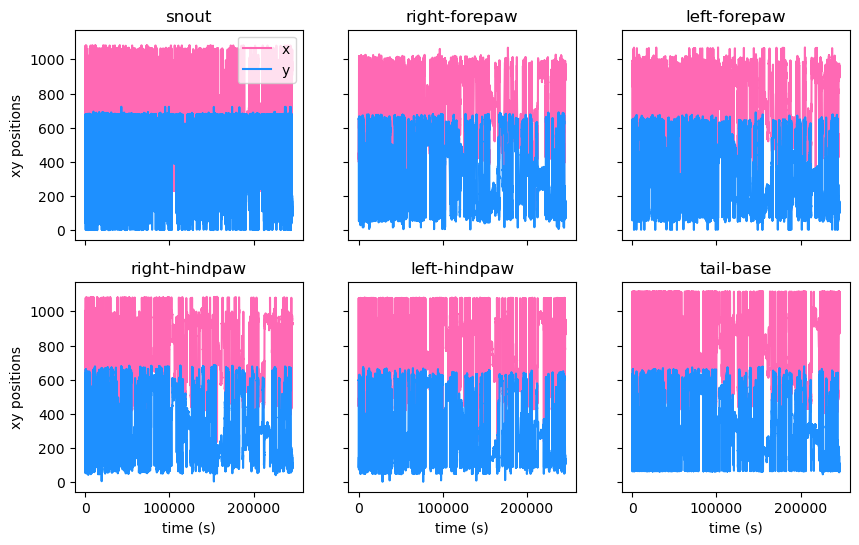

In [6]:
# plot all example files
bodyparts_names = ['snout',
                   'right-forepaw', 'left-forepaw', 
                   'right-hindpaw', 'left-hindpaw', 
                   'tail-base']
cols = 3
rows = int(np.ceil(int(pose.shape[1]/2)/cols))
count = 0
fig, ax = plt.subplots(rows, cols, figsize=(10, 6), sharex=True, sharey=True)
for row in range(rows):
    for col in range(cols):
        try:
            ax[row, col].plot(pose[:, 2*count], c='hotpink', label='x')
            ax[row, col].plot(pose[:, 2*count+1], c='dodgerblue', label='y')
            if col == 0 and row == 0:
                ax[row, col].legend()
            ax[row, col].set_title(bodyparts_names[count])
            if col == 0:
                ax[row, col].set_ylabel('xy positions')

            if row == rows-1:
                ax[row, col].set_xlabel('time (s)')
            count += 1
        except IndexError:
            pass

plt.show()



### save processed pose file 

In [7]:
np.save('../processed_data/pose_video_2.npy', pose)